# PCA for Bag of Words

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [160]:
df = pd.read_csv('Data/Bag of words/bow_filtered.csv')  
df.head() # 42 data points, 422 words

,Unnamed: 0,accountants,accounting,acquire,acquired,acquirers,acquiring,acquisition,acquisitions,activist,...,virus,viruses,wage,wages,warming,wholesale,wholesalers,worker,workers,workforce
0,ADM_2012.txt,0.0,0.004717,0.000000,0.00000,0.00000,0.000000,0.004717,0.004717,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.004717
1,ADM_2015.txt,0.0,0.003717,0.000000,0.00000,0.00000,0.000000,0.011152,0.003717,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.003717
2,ADM_2018.txt,0.0,0.002950,0.000000,0.00295,0.00295,0.000000,0.017699,0.008850,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.002950
3,ANFI_2015.txt,0.0,0.003428,0.002571,0.00000,0.00000,0.000857,0.003428,0.005998,0.0,...,0.001714,0.0,0.000857,0.000857,0.003428,0.001714,0.0,0.0,0.005141,0.001714
4,ANFI_2018.txt,0.0,0.001634,0.000000,0.00000,0.00000,0.000000,0.000817,0.006536,0.0,...,0.000000,0.0,0.000000,0.000000,0.003268,0.003268,0.0,0.0,0.000817,0.001634


Scaling each feature

In [155]:
X = df.values[:,1:]

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Perform 20-component PCA to evaluate the marginal explained variances

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

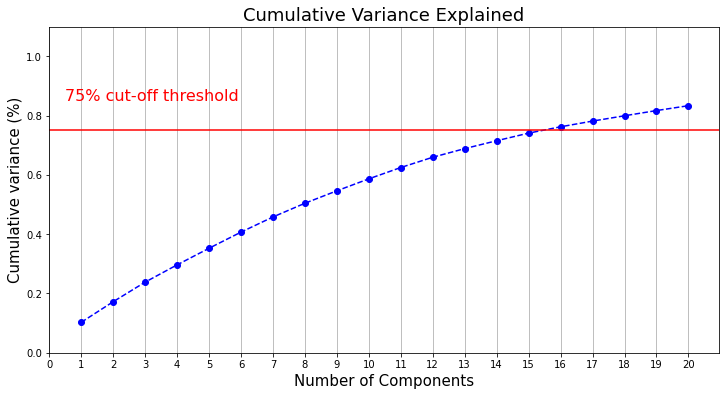

In [157]:
# adapted from: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 21, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', size=15)
plt.xticks(np.arange(0, 21, step=1))
plt.ylabel('Cumulative variance (%)', size=15)
plt.title('Cumulative Variance Explained', size=18)

plt.axhline(y=0.75, color='r', linestyle='-')
plt.text(0.5, 0.85, '75% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

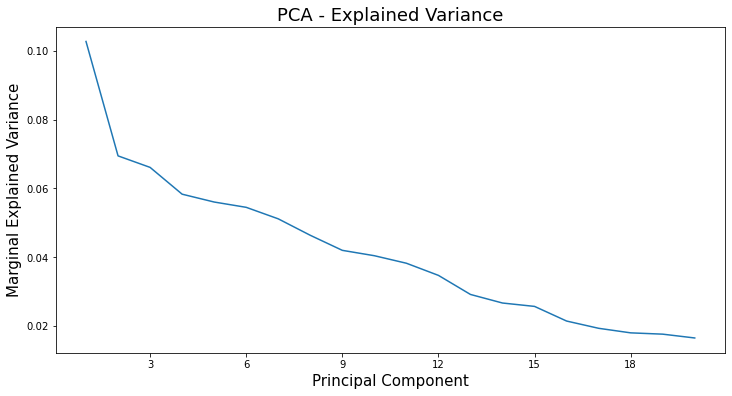

In [158]:
ax = plt.figure().gca()
plt.plot(np.arange(1,21,1).astype(int), pca.explained_variance_ratio_)
plt.title('PCA - Explained Variance', size=18)
plt.xlabel('Principal Component', size=15)
plt.ylabel('Marginal Explained Variance', size=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

Perform 5-component PCA based on the dropoff in explained variance and the limited sample size of the data set

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [104]:
print('Explained variation per principal component:')
print(pca.explained_variance_ratio_)

Explained variation per principal component:
[0.10271927 0.06942544 0.06607747 0.05827922 0.05599765]


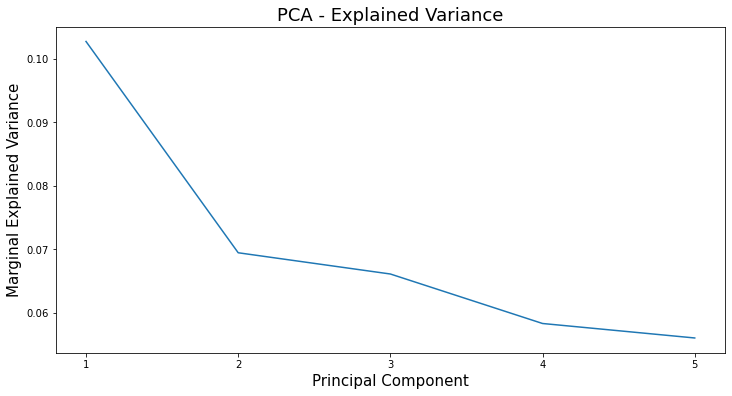

In [149]:
ax = plt.figure().gca()
plt.plot(np.arange(1,6,1).astype(int), pca.explained_variance_ratio_)
plt.title('PCA - Explained Variance', size=18)
plt.xlabel('Principal Component', size=15)
plt.ylabel('Marginal Explained Variance', size=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [93]:
# each principal component expressed in the original feature space
pca.components_.shape

(5, 422)

Export principal component data expressed in the original feature space to csv for analysis:

In [94]:
df_feature_space = pd.DataFrame(pca.components_)
df_feature_space.columns = df.columns[1:]
df_feature_space.to_csv('Data/PCA/PCA_original_feature_weights.csv')

In [95]:
# explained variance values for each of the 5 principal components
pca.explained_variance_

array([44.40478868, 30.01211113, 28.56480633, 25.19368179, 24.20737551])

In [96]:
# 5 new features created from the principal component analysis
PCs = pca.transform(X)
PCs.shape

(42, 5)

Export principal components to csv for analysis:

In [97]:
df_feature_space = pd.DataFrame(PCs)
df_feature_space.to_csv('Data/PCA/PCA_new_transformed_features.csv')